<a href="https://colab.research.google.com/github/lamiya-user/ML/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

set a random seed using numpy's random.seed() function. where seed is set to 0.

In [3]:
np.random.seed()

make random clusters, using make_blobs class. the make_blobs class will be able to take many inputs.

input:

n_sample : total number of points equally divided among clusters
value will be 5000
centres: the number of centres to generate
value: [[4,4],[-2,-1],[2,-3],[1,1]]
cluster_std = std deviation
value: 0.9

output: x: array of shape [n_samples, n_features]--> feature matrix
y: array of shape [n_samples],(response vector)

display the scatter plot

In [5]:
x,y =make_blobs(n_samples=5000, centers=[[4,4],[-2,-1],[2,-3],[1,1]],cluster_std=0.9)

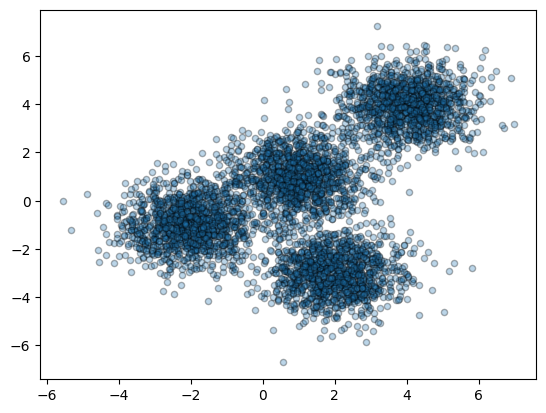

In [6]:
plt.scatter(x[:,0],x[:,1],marker=".",alpha =0.3,ec='k',s=80)

set up the k means clustering
init: initialising method of centroids
1. value: kmeans++
selects initial cluster centres in a smart way to speed up.
2. n_clusters:
number of cluster to form and number of centroids to generate.
value: 4
3. n_init:
number of times k means algorithm will run with different centroid speeds.
value: 12

In [7]:
k_means=KMeans(init="k-means++",n_clusters=4,n_init=12)

fit

In [9]:
k_means.fit(x)

KMeans(n_clusters=4, n_init=12)

In [47]:
k_means_labels =k_means.labels_

In [60]:
k_means_labels

array([3, 1, 0, ..., 3, 1, 2], dtype=int32)

In [17]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.98700321, -3.01516012],
       [-2.06171469, -0.98854829],
       [ 4.01679144,  3.98094501],
       [ 0.97625381,  1.01344424]])

Create the visul plots

In [61]:
#initialise the plot
fig =plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

In [62]:
#set k_means_labels to get unique label
colors =plt.cm.tab10(np.linspace(0,1,len(set(k_means_labels))))

In [63]:
#create a plot
ax =fig.add_subplot(1,1,1)

In [64]:
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
  my_members =(k_means_labels == k)

In [65]:
#define centroid or cluster center
cluster_center =k_means_cluster_centers[k]

In [66]:
#plots data points
ax.plot(x[my_members,0],x[my_members,1],'w',markerfacecolor=col,marker='.',ms=10)

In [67]:
#plots centroid
ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)

In [68]:
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

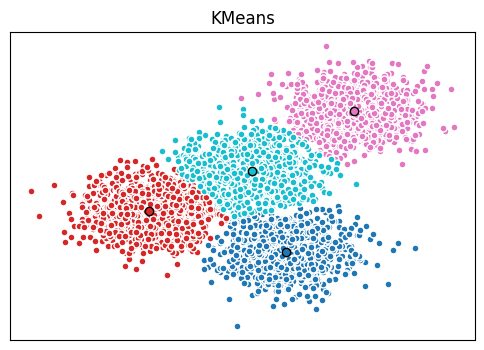

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming k_means_labels and x are defined properly
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(np.unique(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(k_means_cluster_centers)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]

    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.', ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k')

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()
